In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
%matplotlib inline

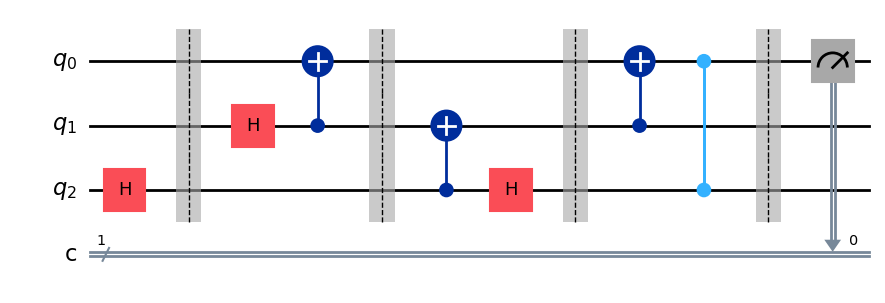

In [2]:
# quantum teleportation circuit using deferred measurement
circuit = QuantumCircuit(3, 1)

# initialize Olivia's qubit (quantum state to teleport)
circuit.h(2)
circuit.barrier()

# create Bell state pair
circuit.h(1)
circuit.cx(1, 0)
circuit.barrier()

# Olivia performs Bell state measurement
circuit.cx(2, 1)
circuit.h(2)
circuit.barrier()

# apply conditional operations on Barron's qubit
circuit.cx(1, 0)
circuit.cz(2, 0)
circuit.barrier()

# measure Barron's destination qubit
circuit.measure(0, 0)

circuit.draw(output='mpl')

In [3]:
# UPDATE: Code updated after recording to resolve breaking changes from Qiskit 1.0
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
service = QiskitRuntimeService(channel='ibm_quantum', token='YOUR_IBM_QUANTUM_CLOUD_API_KEY')

/home/codespace/.local/lib/python3.10/site-packages/qiskit_ibm_runtime/qiskit_runtime_service.py:879: UserWarning: Your current pending jobs are estimated to consume 649.5556236231932 quantum seconds, but you only have 513 quantum seconds left in your monthly quota; therefore, it is likely this job will be canceled
  warnings.warn(warning_message)


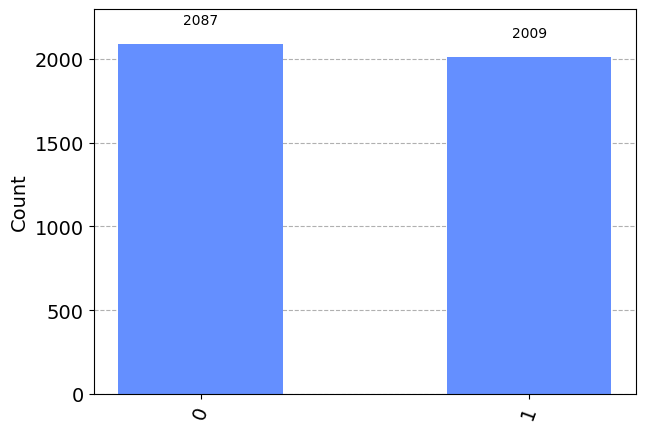

In [4]:
# UPDATE: Code updated after recording to resolve breaking changes from Qiskit 1.0
qcomp = service.least_busy(operational=True, simulator=False) # select least busy quantum computer

pm = generate_preset_pass_manager(backend=qcomp, optimization_level=1) # optimize the circuit for quantum execution
isa_circuit = pm.run(circuit) # modify circuit for qcomp's specific Instruction Set Architecture (ISA)

sampler = Sampler(qcomp)
job = sampler.run([isa_circuit])
result = job.result()
plot_histogram(result[0].data.c.get_counts())
# NOTE: This may take a while... You can check job status on the IBM Quantum Platform web dashboard.